In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
pd.set_option('display.width', 100)

In [4]:
cwd = os.getcwd()

In [5]:
cwd

'/Users/brodyhill/Desktop/CapstoneTwo'

In [6]:
gpu2 = pd.read_csv('GPU_benchmarks_v7.csv')

In [7]:
gpu1 = pd.read_csv('gpu_specs_v6.csv')

In [8]:
gpu1.head()

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [9]:
gpu2.head()

,GPU,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [10]:
gpu_3 = gpu1.merge(gpu2, on = 'GPU')

In [11]:
gpu_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      1088 non-null   object 
 1   GPU               1088 non-null   object 
 2   releaseYear       1088 non-null   float64
 3   memSize           1026 non-null   float64
 4   memBusWidth       1026 non-null   float64
 5   gpuClock          1088 non-null   int64  
 6   memClock          1026 non-null   float64
 7   unifiedShader     905 non-null    float64
 8   tmu               1088 non-null   int64  
 9   rop               1088 non-null   int64  
 10  pixelShader       183 non-null    float64
 11  vertexShader      183 non-null    float64
 12  igp               1088 non-null   object 
 13  bus               1088 non-null   object 
 14  memType           1088 non-null   object 
 15  gpuChip           1088 non-null   object 
 16  G3Dmark           1088 non-null   int64  


In [12]:
missing = pd.concat([gpu_3.isnull().sum(), 100 * gpu_3.isnull().mean()], axis=1)

In [13]:
missing.columns=['count', '%']
missing.sort_values(by = ['count','%'], ascending = False)

,count,%
pixelShader,905,83.180147
vertexShader,905,83.180147
price,627,57.628676
gpuValue,627,57.628676
TDP,497,45.680147
powerPerformance,497,45.680147
unifiedShader,183,16.819853
memSize,62,5.698529
memBusWidth,62,5.698529
memClock,62,5.698529


Beofre anything else, I wanted to get a sense on how much of my data was missing. Thankfully, the metrics I care about are mostly present and accounted for. I will explore a bit more, but I will likely drop columns with more than 6% of the data missing. 

In [14]:
gpu_3.select_dtypes(object)

,manufacturer,GPU,igp,bus,memType,gpuChip,category
0,NVIDIA,GeForce MX550,No,PCIe 4.0 x8,GDDR6,TU117,Unknown
1,NVIDIA,GeForce RTX 3090 Ti,No,PCIe 4.0 x16,GDDR6X,GA102,Unknown
2,AMD,Radeon RX 6400,No,PCIe 4.0 x4,GDDR6,Navi 24,Unknown
3,AMD,Radeon RX 6500 XT,No,PCIe 4.0 x4,GDDR6,Navi 24,Unknown
4,AMD,Radeon RX 6700S,No,PCIe 4.0 x8,GDDR6,Navi 23,Unknown
...,...,...,...,...,...,...,...
1083,ATI,Radeon VE,No,AGP 4x,DDR,Rage 6,Unknown
1084,NVIDIA,GeForce2 Go,No,AGP 4x,DDR,NV11B,Mobile
1085,NVIDIA,GeForce2 Go,No,AGP 4x,DDR,NV11B,Mobile
1086,NVIDIA,GeForce2 MX,No,AGP 4x,SDR,NV11,Desktop


I want to see how any rows contain "unknown" in the category column.

In [15]:
unknown = gpu_3[gpu_3['category'] == 'Unknown']

In [16]:
len(unknown) #that's not so bad, may make for some interesting visualiztaions

291

Let's begin checking for duplicates. 

In [17]:
gpu_3.GPU.value_counts()

GPU
ION                     5
Radeon Vega 8 Mobile    5
GeForce GT 555M         5
GeForce 6800 XT         4
GeForce GTX 965M        4
                       ..
GRID K160Q              1
GRID K180Q              1
GRID K2                 1
GRID K240Q              1
GeForce2 Ultra          1
Name: count, Length: 954, dtype: int64

In [18]:
(gpu_3['GPU'] + ', ' + gpu_3['manufacturer']).value_counts()

ION, NVIDIA                  5
Radeon Vega 8 Mobile, AMD    5
GeForce GT 555M, NVIDIA      5
GeForce 6800 XT, NVIDIA      4
GeForce GTX 965M, NVIDIA     4
                            ..
GRID K160Q, NVIDIA           1
GRID K180Q, NVIDIA           1
GRID K2, NVIDIA              1
GRID K240Q, NVIDIA           1
GeForce2 Ultra, NVIDIA       1
Name: count, Length: 954, dtype: int64

In [19]:
gpu_3[gpu_3['GPU'] == 'ION'].T

,795,796,797,798,799
manufacturer,NVIDIA,NVIDIA,NVIDIA,NVIDIA,NVIDIA
GPU,ION,ION,ION,ION,ION
releaseYear,2008.0,2008.0,2008.0,2008.0,2008.0
memSize,NaN,NaN,NaN,NaN,NaN
memBusWidth,NaN,NaN,NaN,NaN,NaN
gpuClock,575,500,450,450,450
memClock,NaN,NaN,NaN,NaN,NaN
unifiedShader,16.0,16.0,16.0,16.0,16.0
tmu,8,8,8,8,8
rop,4,4,4,4,4


So we have some duplicated GPUs here, I want to drop those. 

In [20]:
gpu_3[gpu_3.duplicated('GPU') == True]

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,...,memType,gpuChip,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
16,AMD,Radeon Vega 8,2019.0,NaN,NaN,300,NaN,512.0,32,8,...,System Shared,Picasso,1593,421,126.86,12.56,NaN,NaN,2018,"Desktop, Mobile"
17,AMD,Radeon Vega 8,2018.0,NaN,NaN,300,NaN,512.0,32,8,...,System Shared,Raven,1593,421,126.86,12.56,NaN,NaN,2018,"Desktop, Mobile"
19,AMD,Radeon Vega 8 Mobile,2019.0,NaN,NaN,300,NaN,512.0,32,8,...,System Shared,Raven,1438,349,NaN,NaN,NaN,NaN,2017,Unknown
20,AMD,Radeon Vega 8 Mobile,2019.0,NaN,NaN,300,NaN,512.0,32,8,...,System Shared,Picasso,1438,349,NaN,NaN,NaN,NaN,2017,Unknown
21,AMD,Radeon Vega 8 Mobile,2019.0,NaN,NaN,300,NaN,512.0,32,8,...,System Shared,Picasso,1438,349,NaN,NaN,NaN,NaN,2017,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,NVIDIA,GeForce 6800 Ultra,2004.0,0.256,256.0,425,550.0,NaN,16,16,...,GDDR3,NV40,139,153,NaN,NaN,NaN,NaN,2009,Desktop
1044,NVIDIA,GeForce FX 5200,2003.0,0.128,128.0,250,200.0,NaN,4,2,...,DDR,NV18C,8,154,129.00,0.06,NaN,NaN,2010,Desktop
1058,NVIDIA,GeForce4 Ti 4800,2003.0,0.128,128.0,300,325.0,NaN,8,4,...,DDR,NV28,6,190,NaN,NaN,NaN,NaN,2009,Unknown
1072,NVIDIA,GeForce4 Ti 4200,2002.0,0.064,128.0,250,250.0,NaN,8,4,...,DDR,NV25,6,154,NaN,NaN,NaN,NaN,2009,Unknown


In [21]:
gpu_4 = gpu_3.drop_duplicates(['GPU'], keep = 'first')

In [22]:
gpu_4[gpu_4.duplicated('GPU') == True ] #yay!

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,...,memType,gpuChip,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category


In [23]:
gpu_4.GPU.value_counts() #that's what I like to see

GPU
GeForce MX550              1
Quadro FX 380              1
Mobility FireGL V5725      1
Mobility Radeon HD 4330    1
Mobility Radeon HD 4350    1
                          ..
FirePro M6100              1
FirePro R5000              1
GeForce 705M               1
GeForce 710M               1
GeForce2 Ultra             1
Name: count, Length: 954, dtype: int64

In [24]:
gpu_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 1087
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      954 non-null    object 
 1   GPU               954 non-null    object 
 2   releaseYear       954 non-null    float64
 3   memSize           917 non-null    float64
 4   memBusWidth       917 non-null    float64
 5   gpuClock          954 non-null    int64  
 6   memClock          917 non-null    float64
 7   unifiedShader     794 non-null    float64
 8   tmu               954 non-null    int64  
 9   rop               954 non-null    int64  
 10  pixelShader       160 non-null    float64
 11  vertexShader      160 non-null    float64
 12  igp               954 non-null    object 
 13  bus               954 non-null    object 
 14  memType           954 non-null    object 
 15  gpuChip           954 non-null    object 
 16  G3Dmark           954 non-null    int64  
 17  G

In [25]:
gpu_4[['pixelShader','vertexShader']]

,pixelShader,vertexShader
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1082,4.0,0.0
1083,1.0,0.0
1084,2.0,0.0
1086,2.0,0.0


In [26]:
gpu_4[['pixelShader','vertexShader']].isna().sum()

pixelShader     794
vertexShader    794
dtype: int64

There are a lot of missing values in both the pixel shader and vertex shader columns (over 80% in both), and even then some values are just 0. Based on my knowlege of hardware, it wouldn't make sense to guess or impute with anything. They are both specific and unique hardare features. If we don't have the actual feature, best to just leave it. I'm going to drop them. 

In [27]:
gpu_4 = gpu_4.drop(columns = ['pixelShader', 'vertexShader'])

In [28]:
gpu_4.head()

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,...,memType,gpuChip,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,NVIDIA,GeForce MX550,2022.0,2.0,64.0,1065,1500.0,1024.0,32,16,...,GDDR6,TU117,5090,424,NaN,NaN,NaN,NaN,2022,Unknown
1,NVIDIA,GeForce RTX 3090 Ti,2022.0,24.0,384.0,1560,1313.0,10752.0,336,112,...,GDDR6X,GA102,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
2,AMD,Radeon RX 6400,2022.0,4.0,64.0,1923,2000.0,768.0,48,32,...,GDDR6,Navi 24,6958,899,159.99,43.49,NaN,NaN,2022,Unknown
3,AMD,Radeon RX 6500 XT,2022.0,4.0,64.0,2310,2248.0,1024.0,64,32,...,GDDR6,Navi 24,9445,910,199.99,47.23,NaN,NaN,2022,Unknown
4,AMD,Radeon RX 6700S,2022.0,8.0,128.0,1700,1750.0,1792.0,112,64,...,GDDR6,Navi 23,11989,829,NaN,NaN,NaN,NaN,2022,Unknown


Ok, let's look one more time at .info(). Let's examine my feature in question "G3Dmark" as that's the feature I'm interested in predeicting based on other GPU features. 

In [29]:
gpu_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 1087
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      954 non-null    object 
 1   GPU               954 non-null    object 
 2   releaseYear       954 non-null    float64
 3   memSize           917 non-null    float64
 4   memBusWidth       917 non-null    float64
 5   gpuClock          954 non-null    int64  
 6   memClock          917 non-null    float64
 7   unifiedShader     794 non-null    float64
 8   tmu               954 non-null    int64  
 9   rop               954 non-null    int64  
 10  igp               954 non-null    object 
 11  bus               954 non-null    object 
 12  memType           954 non-null    object 
 13  gpuChip           954 non-null    object 
 14  G3Dmark           954 non-null    int64  
 15  G2Dmark           954 non-null    int64  
 16  price             417 non-null    float64
 17  g

no missing values, yay!

In [30]:
gpu_4[['manufacturer', 'GPU']].nunique()

manufacturer      3
GPU             954
dtype: int64

In [31]:
gpu_4.groupby(by = 'manufacturer')['GPU'].value_counts()

manufacturer  GPU               
AMD           FirePro 2270          1
              FirePro M2000         1
              Radeon R7 260X        1
              Radeon R5 M315        1
              Radeon R5 M320        1
                                   ..
NVIDIA        GeForce 6800 LE       1
              GeForce 6800 Ultra    1
              GeForce 6800 XE       1
              GeForce 6800 XT       1
              Tesla T4              1
Name: count, Length: 954, dtype: int64

I'd like to get an idea of what manufacturers are represented here. See below, ATI has not been a relevant player in a long time. I'm more interested in fairly modern GPU's, so I'm going to drop any rows where the GPUs manufactuer was ATI. 

<Axes: xlabel='manufacturer'>

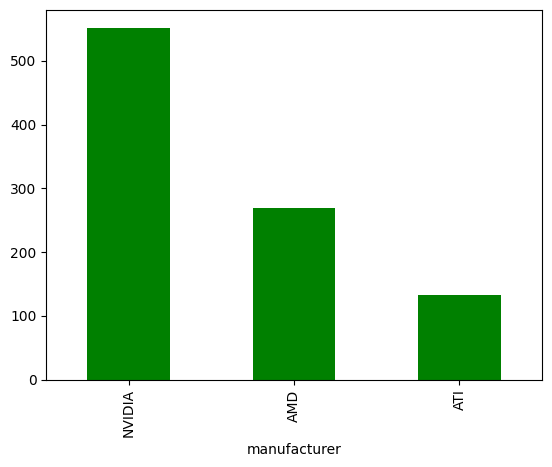

In [32]:
gpu_4.manufacturer.value_counts().plot(kind= 'bar', color = 'g') 

In [33]:
gpu_4 = gpu_4.drop(gpu_4[gpu_4.manufacturer == 'ATI'].index)

In [34]:
gpu_4[gpu_4['manufacturer'] == 'ATI']

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,...,memType,gpuChip,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category


Nice! That's what I like to see!

I now want to get an idea of how AMD and NVIDIA compare to each other in the feature in question, again that's G3Dmark score, just for fun I'll also look at G2Mark score. I'll do this below. 

In [35]:
manufacturer_means = gpu_4.groupby('manufacturer')[['G3Dmark', 'G2Dmark']].mean()

In [36]:
manufacturer_means

,G3Dmark,G2Dmark
manufacturer,,
AMD,4024.130112,513.676580
NVIDIA,2640.884058,305.940217


Text(0.5, 0, 'Score')

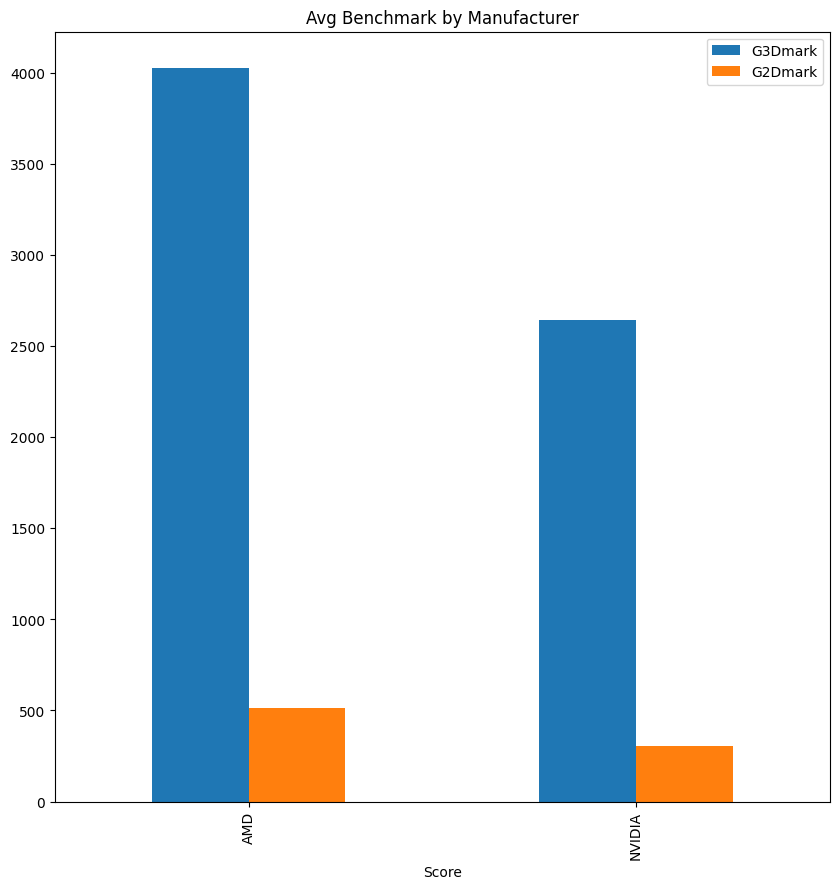

In [37]:
manufacturer_means.plot(kind='bar', figsize=(10, 10), title='Avg Benchmark by Manufacturer')
plt.xlabel('Score')

so AMD has a higher average, but I don't think this tells the full picture. NVIDIA has more GPU's listed in the data and maybe older GPUs with lower score are skewing the data. Let's look at release year. 

In [38]:
gpu_4.groupby('manufacturer')['releaseYear'].value_counts()

manufacturer  releaseYear
AMD           2015.0         38
              2013.0         31
              2012.0         31
              2014.0         30
              2011.0         30
              2016.0         22
              2019.0         20
              2017.0         18
              2020.0         15
              2018.0         13
              2021.0          9
              2010.0          6
              2022.0          3
              2008.0          2
              2007.0          1
NVIDIA        2008.0         52
              2013.0         46
              2006.0         43
              2012.0         41
              2015.0         39
              2010.0         37
              2007.0         37
              2014.0         37
              2011.0         36
              2009.0         30
              2003.0         21
              2004.0         21
              2005.0         18
              2016.0         17
              2017.0         16
              

Just as I thought! There's just more data on NVIDIA GPUs. More scores on data from 2008, older GPUs, will naturally bring down the performance average! I wont put much credence then to the above graph of AMD seemingly leading the pack, It's not an accurate picutre here.

So I know I have no missing benchmark scores, which is great. I'm now going to get the distribution of my other numerical features. 

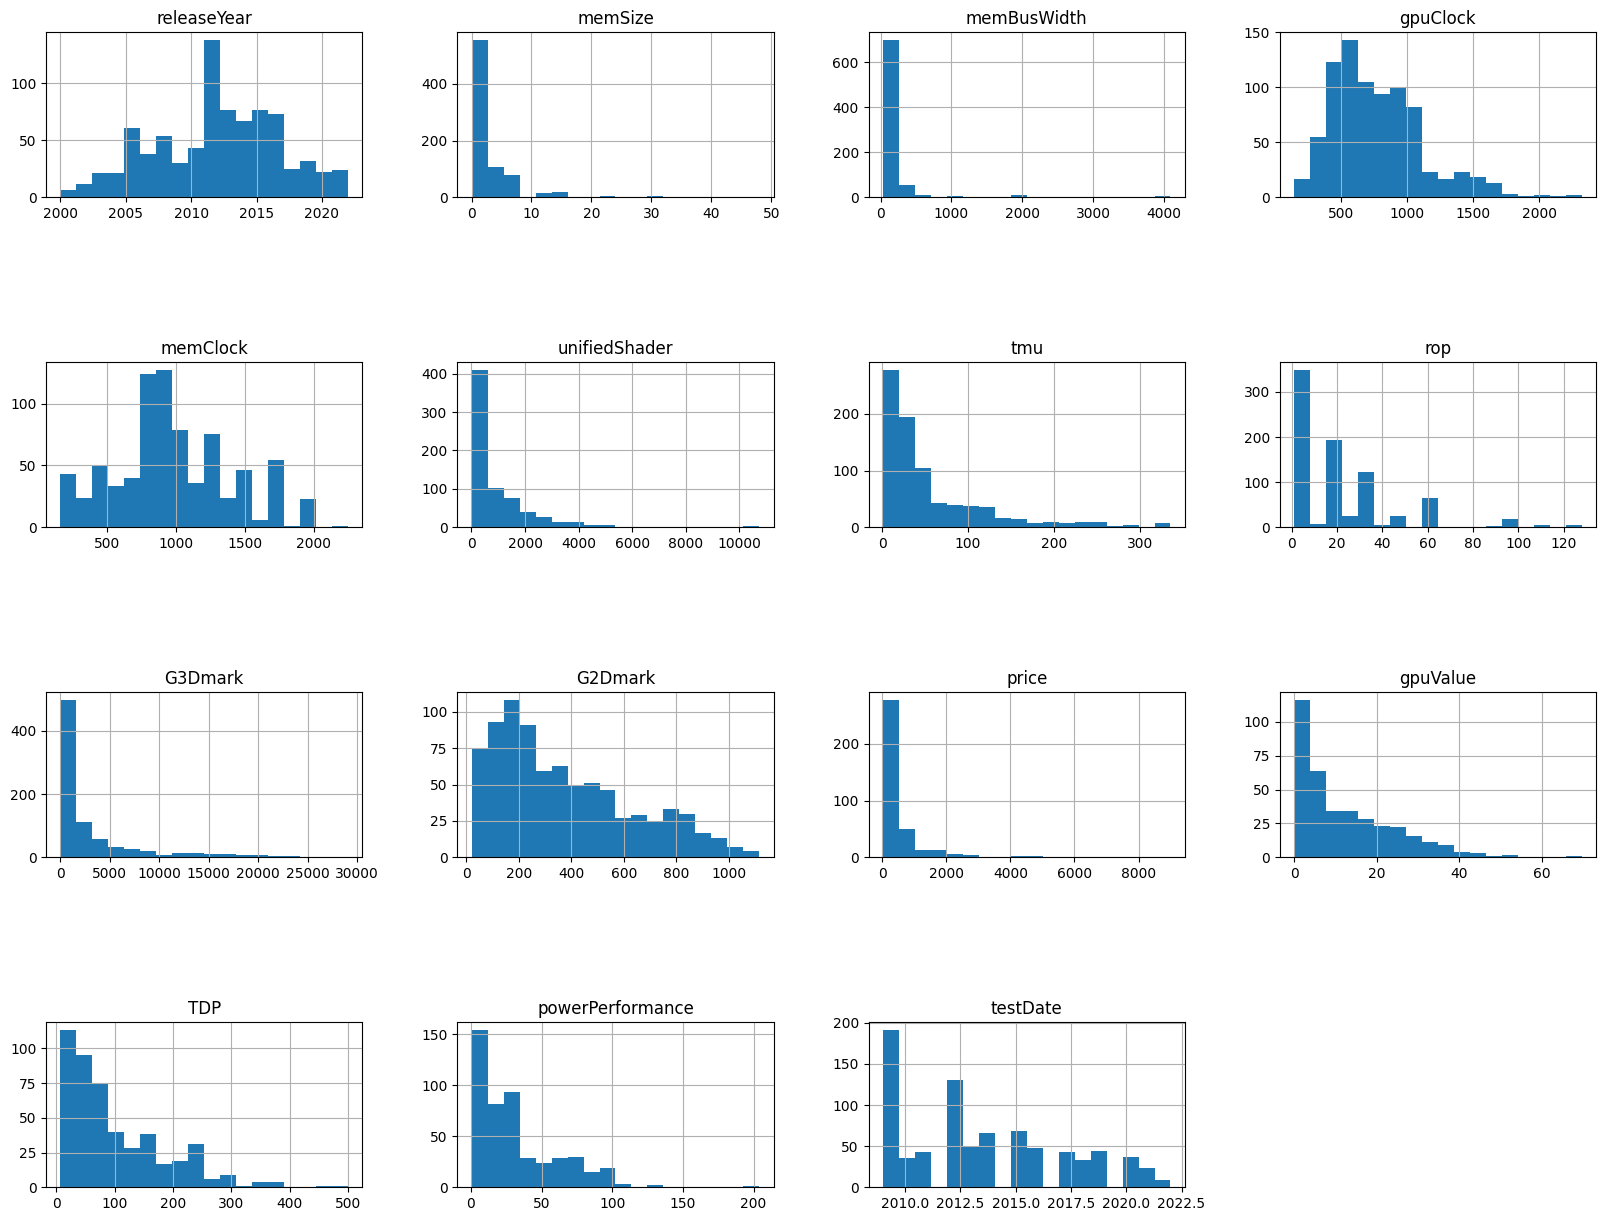

In [39]:
gpu_4.hist(figsize = (20,15), bins = 18)
plt.subplots_adjust(hspace=1)

Hmm, there's a few features I have some concern about. Price, mem buss width, and mem size. Looks like quite a few of those valuesa are zero. let's take a look. 

In [40]:
gpu_4['memBusWidth'].value_counts()

memBusWidth
128.0     288
256.0     199
64.0      173
384.0      42
192.0      32
2048.0     11
512.0      10
4096.0      7
320.0       6
1024.0      5
160.0       3
448.0       3
96.0        2
352.0       2
32.0        2
3072.0      1
Name: count, dtype: int64

Oh, none of the values are zero actually, they're just a low and the graph doesn't do a great job displaying that. 

In [41]:
gpu_4['price'].value_counts()

price
139.99    7
99.99     6
149.99    5
109.99    5
159.99    5
         ..
787.90    1
125.99    1
389.30    1
704.00    1
341.43    1
Name: count, Length: 304, dtype: int64

In [42]:
gpu_3['price'].sort_values(ascending = False)

94      8999.00
98      6300.00
54      4999.99
113     4853.98
99      4741.49
         ...   
1083        NaN
1084        NaN
1085        NaN
1086        NaN
1087        NaN
Name: price, Length: 1088, dtype: float64

So we have a few NaN values for price, and it looks like there may be suspect value for price on the high end. is there really a GPU that costs that much?

In [43]:
gpu_4[gpu_4['price'] == 8999.0]

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,...,memType,gpuChip,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
94,NVIDIA,Quadro GV100,2018.0,32.0,4096.0,1132,848.0,5120.0,320,128,...,HBM2,GV100,17675,841,8999.0,1.96,250.0,70.7,2018,Workstation


Ok, a quick google search actually confirmed it does cost that much. It's high but that's not a problem.

In [44]:
gpu_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 1087
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      821 non-null    object 
 1   GPU               821 non-null    object 
 2   releaseYear       821 non-null    float64
 3   memSize           786 non-null    float64
 4   memBusWidth       786 non-null    float64
 5   gpuClock          821 non-null    int64  
 6   memClock          786 non-null    float64
 7   unifiedShader     700 non-null    float64
 8   tmu               821 non-null    int64  
 9   rop               821 non-null    int64  
 10  igp               821 non-null    object 
 11  bus               821 non-null    object 
 12  memType           821 non-null    object 
 13  gpuChip           821 non-null    object 
 14  G3Dmark           821 non-null    int64  
 15  G2Dmark           821 non-null    int64  
 16  price             368 non-null    float64
 17  g

Taking a loook back at .info() now, it looks like our columns names all make sense, but a few of the data types aren't ideal. I dont think year needs to be float, let's change it. 

In [45]:
gpu_4['releaseYear'] = gpu_4['releaseYear'].astype('int')

In [46]:
gpu_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 1087
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      821 non-null    object 
 1   GPU               821 non-null    object 
 2   releaseYear       821 non-null    int64  
 3   memSize           786 non-null    float64
 4   memBusWidth       786 non-null    float64
 5   gpuClock          821 non-null    int64  
 6   memClock          786 non-null    float64
 7   unifiedShader     700 non-null    float64
 8   tmu               821 non-null    int64  
 9   rop               821 non-null    int64  
 10  igp               821 non-null    object 
 11  bus               821 non-null    object 
 12  memType           821 non-null    object 
 13  gpuChip           821 non-null    object 
 14  G3Dmark           821 non-null    int64  
 15  G2Dmark           821 non-null    int64  
 16  price             368 non-null    float64
 17  g

In [47]:
gpu_4[['testDate','releaseYear']]

,testDate,releaseYear
0,2022,2022
1,2022,2022
2,2022,2022
3,2022,2022
4,2022,2022
...,...,...
1081,2009,2001
1082,2009,2001
1084,2009,2000
1086,2011,2000


So, although I'd rather have datetime objects in the year and test date columns, since it's just the year in both, I'm ok with it.

In [48]:
gpu_4.describe()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,821.000000,786.000000,786.000000,821.000000,786.000000,700.000000,821.000000,821.000000,821.000000,821.000000,368.000000,368.000000,481.000000,481.000000,821.000000
mean,2011.952497,3.078112,242.198473,771.989038,981.801527,960.182857,55.694275,22.198538,3094.103532,374.004872,510.537880,12.312582,101.775468,31.789480,2013.472594
std,4.713389,4.748925,454.525419,341.013484,431.322303,1382.386140,64.684773,23.028631,4923.418038,260.089164,889.204461,11.805838,86.542207,29.228035,3.724447
min,2000.000000,0.032000,32.000000,143.000000,166.000000,8.000000,1.000000,1.000000,1.000000,20.000000,17.500000,0.010000,7.000000,0.630000,2009.000000
25%,2008.000000,0.512000,128.000000,530.000000,750.000000,128.000000,16.000000,8.000000,242.000000,162.000000,129.997500,2.855000,35.000000,8.380000,2010.000000
50%,2012.000000,2.000000,128.000000,723.000000,900.000000,448.000000,32.000000,16.000000,965.000000,310.000000,232.380000,7.995000,75.000000,23.600000,2013.000000
75%,2015.000000,4.000000,256.000000,954.000000,1250.000000,1280.000000,64.000000,32.000000,3400.000000,550.000000,502.220000,19.350000,150.000000,47.400000,2016.000000
max,2022.000000,48.000000,4096.000000,2321.000000,2248.000000,10752.000000,336.000000,128.000000,29094.000000,1117.000000,8999.000000,69.730000,500.000000,204.000000,2022.000000


Looks like the ranges of values all look feasbale, I don't see anything that worries me here. 

But I do know from the info calls above that I still have a good number of missing values, let's take another look. 

In [49]:
missing = pd.concat([gpu_4.isnull().sum(), 100 * gpu_4.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by = ['count','%'], ascending = False)

,count,%
price,453,55.176614
gpuValue,453,55.176614
TDP,340,41.412911
powerPerformance,340,41.412911
unifiedShader,121,14.738124
memSize,35,4.263094
memBusWidth,35,4.263094
memClock,35,4.263094
manufacturer,0,0.000000
GPU,0,0.000000


So, price, GPU Value, Total Power Draw, Power Performance, and the unified shader columns all have a good amount of missing values. Thinking about the question at hand throughout this project, that is identidfying feature importance on performance, and then predicting 3dmark performance based on feature combination, I think it will be ok to drop these columns. I don't think imputing values makes sense here. 

In [50]:
gpu_5 = gpu_4.drop(columns = ['price', 'gpuValue','TDP','powerPerformance','unifiedShader'])

In [51]:
missing = pd.concat([gpu_5.isnull().sum(), 100 * gpu_5.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by = ['count','%'], ascending = False)

,count,%
memSize,35,4.263094
memBusWidth,35,4.263094
memClock,35,4.263094
manufacturer,0,0.000000
GPU,0,0.000000
releaseYear,0,0.000000
gpuClock,0,0.000000
tmu,0,0.000000
rop,0,0.000000
igp,0,0.000000


In [52]:
gpu_5.shape

(821, 17)

Ok, much better. We only have three columns with missing values and it's a small percentage, I'll go ahead and drop these null values so our data frame is clear of any missing data. 

In [53]:
gpu_clean = gpu_5

In [54]:
gpu_clean = gpu_clean.drop(gpu_clean[gpu_clean['memSize'].isna()].index)

In [55]:
gpu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 0 to 1087
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  786 non-null    object 
 1   GPU           786 non-null    object 
 2   releaseYear   786 non-null    int64  
 3   memSize       786 non-null    float64
 4   memBusWidth   786 non-null    float64
 5   gpuClock      786 non-null    int64  
 6   memClock      786 non-null    float64
 7   tmu           786 non-null    int64  
 8   rop           786 non-null    int64  
 9   igp           786 non-null    object 
 10  bus           786 non-null    object 
 11  memType       786 non-null    object 
 12  gpuChip       786 non-null    object 
 13  G3Dmark       786 non-null    int64  
 14  G2Dmark       786 non-null    int64  
 15  testDate      786 non-null    int64  
 16  category      786 non-null    object 
dtypes: float64(3), int64(7), object(7)
memory usage: 110.5+ KB


In [56]:
gpu_clean.head()

,manufacturer,GPU,releaseYear,memSize,memBusWidth,gpuClock,memClock,tmu,rop,igp,bus,memType,gpuChip,G3Dmark,G2Dmark,testDate,category
0,NVIDIA,GeForce MX550,2022,2.0,64.0,1065,1500.0,32,16,No,PCIe 4.0 x8,GDDR6,TU117,5090,424,2022,Unknown
1,NVIDIA,GeForce RTX 3090 Ti,2022,24.0,384.0,1560,1313.0,336,112,No,PCIe 4.0 x16,GDDR6X,GA102,29094,1117,2022,Unknown
2,AMD,Radeon RX 6400,2022,4.0,64.0,1923,2000.0,48,32,No,PCIe 4.0 x4,GDDR6,Navi 24,6958,899,2022,Unknown
3,AMD,Radeon RX 6500 XT,2022,4.0,64.0,2310,2248.0,64,32,No,PCIe 4.0 x4,GDDR6,Navi 24,9445,910,2022,Unknown
4,AMD,Radeon RX 6700S,2022,8.0,128.0,1700,1750.0,112,64,No,PCIe 4.0 x8,GDDR6,Navi 23,11989,829,2022,Unknown


In [57]:
gpu_clean.shape

(786, 17)

Beautiful. No missing data and I still have plenty to accomplish the task at hand. 

In [58]:
gpu = gpu_clean

In [59]:
gpu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 0 to 1087
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  786 non-null    object 
 1   GPU           786 non-null    object 
 2   releaseYear   786 non-null    int64  
 3   memSize       786 non-null    float64
 4   memBusWidth   786 non-null    float64
 5   gpuClock      786 non-null    int64  
 6   memClock      786 non-null    float64
 7   tmu           786 non-null    int64  
 8   rop           786 non-null    int64  
 9   igp           786 non-null    object 
 10  bus           786 non-null    object 
 11  memType       786 non-null    object 
 12  gpuChip       786 non-null    object 
 13  G3Dmark       786 non-null    int64  
 14  G2Dmark       786 non-null    int64  
 15  testDate      786 non-null    int64  
 16  category      786 non-null    object 
dtypes: float64(3), int64(7), object(7)
memory usage: 110.5+ KB


In [62]:
gpu.to_csv('gpu.csv', index = False, sep =',')